# Machine Learning Model Deployment Project 

----

`Aim`: To predict the aqueous solubility of molecules (Delaney solubility) using molecular descriptors and machine learning regression models, with a focus on evaluating the performance of the XGBoost regressor.

`Dataset`: Delaney Solubility Dataset  

----

In [1]:
import pandas as pd

In [2]:
#Loading the dataset
df = pd.read_csv("/Users/mr.questionbank/Desktop/Python_Course_Work/data_files/csv/delaney_solubility_with_descriptors.csv")
df.head()  # Display the first few rows of the dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


here the 'logS' is the dependent variable. And the remaining varibles are being used to predict it i.e. Independent variables.

## Description of the dataset
* Here the 'logS' is the dependent variable. And the remaining variables are being used to predict it i.e. Independent variables.

| **Column Name**         | **Description**                                                                                   |
|-------------------------|---------------------------------------------------------------------------------------------------|
| **MolLogP**             | Tells how much the molecule prefers **oil over water**. Higher values = **less water-soluble**.   |
| **MolWt**               | The **weight** of the molecule. Bigger molecules are usually **harder to dissolve** in water.     |
| **NumRotatableBonds**   | The number of **movable single bonds**. More flexibility can make the molecule **less soluble**.  |
| **AromaticProportion**  | The portion of the molecule made of **aromatic rings** (like benzene). Affects how it dissolves.  |
| **logS**                | The measured **solubility** of the molecule (what we want to predict). Lower = **less soluble**.   |



## Data preparation

### Data Separation

In [3]:
# Separating the dataset into features and target variable i.e. x and y
y = df["logS"]
x = df.drop("logS", axis=1)

In [4]:
# This is logS (Dependent Variable). 
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [5]:
# This is the remaining columns (Independent Variables).
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Spliting 
(using scikit learn package)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100 )

## Model Building
Using linear regression

### Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# model training 
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
# Model application for predictions
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred =  lr.predict(x_test)


In [10]:
# y predicted values of training data
y_lr_train_pred 

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [11]:
# y predicted values of testing data
y_lr_test_pred 

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

#### Evaluating model performance

In [12]:
from sklearn.metrics import mean_squared_error, r2_score 

In [13]:
# using MSE and R2 Score for training dataset
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)
print(f"MSE for training dataset = {lr_train_mse}")
print(F"R2 Score for training dataset = {lr_train_r2}")

MSE for training dataset = 1.0075362951093687
R2 Score for training dataset = 0.7645051774663391


In [14]:
# using MSE and R2 Score for testing dataset
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)
print(f"MSE for testing dataset = {lr_test_mse}")
print(F"R2 Score for testing dataset = {lr_test_r2}")

MSE for testing dataset = 1.0206953660861033
R2 Score for testing dataset = 0.7891616188563282


In [15]:
lr_results = pd.DataFrame(["LinearRegression", lr_train_mse, lr_test_mse, lr_train_r2, lr_test_r2]).transpose()
lr_results.columns = ["Method", "Training MSE", "Testing MSE", "Training R2", "Testing R2"]
lr_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2
0,LinearRegression,1.007536,1.020695,0.764505,0.789162


### Random Forest Regression 

In [16]:
from sklearn.ensemble import RandomForestRegressor

#### Training the model

In [17]:
rf = RandomForestRegressor(max_depth = 2, random_state= 100)
rf.fit(x_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


#### Applying the model 

In [18]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### Evaluating the model

In [19]:
# Using mean squared error, and r2 score on TRAIN dataset
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)
print(f"MSE for training dataset = {rf_train_mse}")
print(f"R2 Score for training dataset = {rf_train_r2}")

MSE for training dataset = 1.028227802112806
R2 Score for training dataset = 0.7596688824431413


In [20]:
# Using mean squared error, and r2 score on TEST dataset
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)
print(f"MSE for testing dataset = {rf_test_mse}")
print(F"R2 Score for testing dataset = {rf_test_r2}")

MSE for testing dataset = 1.407688264904896
R2 Score for testing dataset = 0.7092230211002489


In [22]:
rf_results = pd.DataFrame(["RandomForestRegressor",rf_train_mse, rf_test_mse, rf_train_r2, rf_test_r2]).transpose()
rf_results.columns = ["Method", "Training MSE", "Testing MSE", "Training R2", "Testing R2"]
rf_results

,Method,Training MSE,Testing MSE,Training R2,Testing R2
0,RandomForestRegressor,1.028228,1.407688,0.759669,0.709223


## Model comparision 

In [23]:
df_models = pd.concat([lr_results, rf_results])

In [24]:
df_models.reset_index(drop =True)

,Method,Training MSE,Testing MSE,Training R2,Testing R2
0,LinearRegression,1.007536,1.020695,0.764505,0.789162
1,RandomForestRegressor,1.028228,1.407688,0.759669,0.709223


## Data Visualization 

In [25]:
import matplotlib.pyplot as plt
import numpy as np

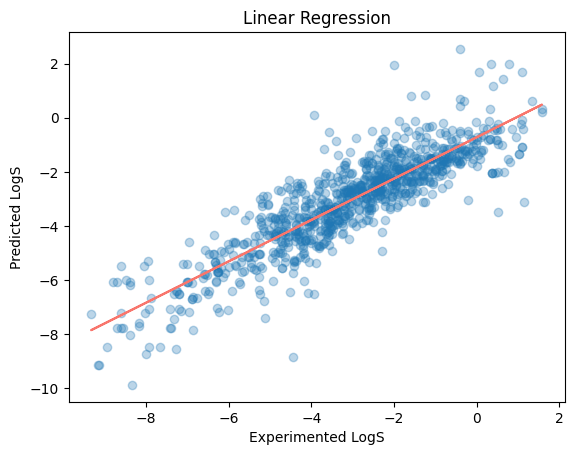

In [26]:
# Linear Regression Visualization  
plt.scatter(x = y_train, y = y_lr_train_pred, alpha= 0.3)
plt.ylabel("Predicted LogS")
plt.xlabel("Experimented LogS")
plt.title("Linear Regression")

# Graphline 
z = np.polyfit (y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "#F8766D")


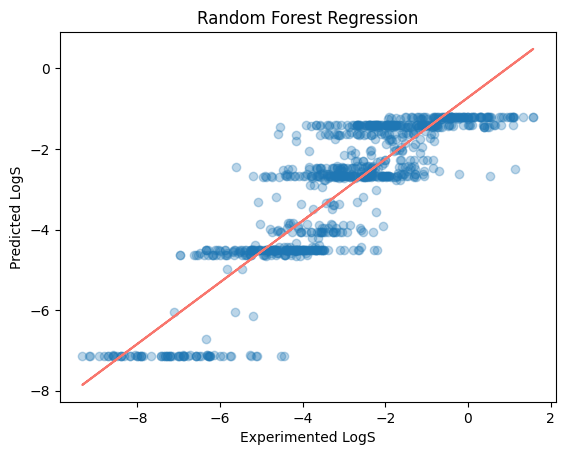

In [ ]:
# Random Forest Regression Visualization  
plt.scatter(x = y_train, y = y_rf_train_pred, alpha= 0.3)
plt.plot()
plt.ylabel("Predicted LogS")
plt.xlabel("Experimented LogS")
plt.title("Random Forest Regression")


# Graphline 
z = np.polyfit (y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), "#F8766D")